In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


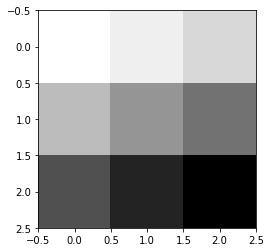

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

In [3]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[0.]],[[1.]]],
                      [[[0.]],[[1.]],[[0.]]],
                      [[[1.]],[[0.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print(conv2d_img.reshape(3,3))

image.shape (1, 3, 3, 1)
weight.shape (3, 3, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[  6.  12.   8.]
 [ 14.  25.  16.]
 [ 12.  18.  14.]]


In [4]:
#X = tf.Variable(np.ones((1,5,5,1)), dtype=tf.float32)
X = np.ones((1,5,5,1), dtype=np.float32)
Y = tf.Variable(np.zeros((1,5,5,1)), dtype=tf.float32)
f = tf.constant([[[[1.]],[[1.]],[[1.]]],
                      [[[1.]],[[1.]],[[0.]]],
                      [[[1.]],[[0.]],[[1.]]]])
b = tf.constant([[6.]])
print(X.shape)
print(f.shape)
print(b.shape)
L1 = tf.nn.conv2d(X, f, strides=[1,1,1,1], padding="VALID")
L1 = tf.add(L1, b)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,1,1,1], padding="VALID")
L1 = tf.nn.dropout(L1, keep_prob=0.5)
r = L1.eval()
print(L1.get_shape())
print(r.reshape(2,2))


(1, 5, 5, 1)
(3, 3, 1, 1)
(1, 1)
(1, 2, 2, 1)
[[ 26.  26.]
 [  0.  26.]]


In [5]:
X = np.ones((1,7,7,1), dtype=np.float32)
f = tf.constant([[[[1.]],[[1.]],[[0.]],[[0.]]],
                 [[[1.]],[[1.]],[[0.]],[[0.]]],
                 [[[0.]],[[0.]],[[0.]],[[0.]]],
                 [[[0.]],[[0.]],[[0.]],[[0.]]]])
L2 = tf.nn.conv2d_transpose(value=X, filter=f, output_shape=[1,14,14,1], strides=[1,2,2,1], padding="SAME")
two = tf.Variable(2)
r = L2.eval()
print(r.reshape(14,14))

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
X = np.ones((1,28,28,1), dtype=np.float32)
f = tf.constant(np.ones([16, 16, 1, 1], dtype=np.float32))
L2 = tf.nn.conv2d_transpose(value=X, filter=f, output_shape=[1,224,224,1], strides=[1,8,8,1], padding="SAME")
r = L2.eval()
print(r.reshape(224,224))

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
